In [1]:
import os
import itertools
import random
from typing import Sequence

import matplotlib.pyplot as plt
import torch
from pathlib import Path
from pytorch_lightning import seed_everything
from torch.nn import functional as F
import numpy as np

try:
    # be ready for 3.10 when it drops
    from enum import StrEnum
except ImportError:
    from backports.strenum import StrEnum
from enum import auto

# from nn_core.common import PROJECT_ROOT
import pickle

print(os.path.abspath(os.curdir))
os.chdir("..")
print(os.path.abspath(os.curdir))
from zeroshotrl.rl_agents.ppo.ppo_end_to_end_relu_stack_align import FeatureExtractor, Policy, Agent
from zeroshotrl.utils.relative import *
from zeroshotrl.utils.notebooks import *
from zeroshotrl.envs.carracing.car_racing import CarRacing

from zeroshotrl.utils.models import load_model_from_path

/Users/antonioricciardi/projects/rl_relrepr_gymnasium/notebooks
/Users/antonioricciardi/projects/rl_relrepr_gymnasium


In [2]:
from tueplots import bundles

# plt.rcParams.update(bundles.icml2022())
bundles.icml2022()

CMAP = "jet"

In [36]:
img_path = 'data/hq_obs/CarRacing-v2-standard_green_1000.pkl'
obs = pickle.load(open(img_path, 'rb'))

In [37]:
obs[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

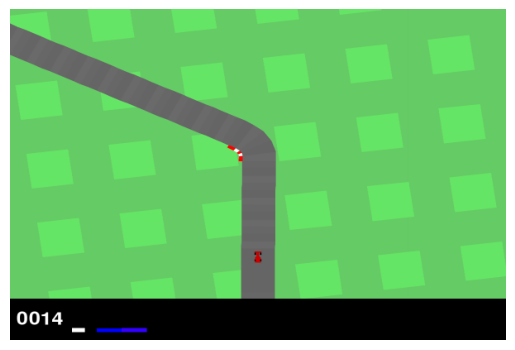

In [38]:
# plot ith image
i = 40
plt.imshow(obs[i], cmap='gray')
plt.axis('off')
plt.show()

